<a href="https://colab.research.google.com/github/mamathaguntu/CMPE255/blob/master/Mamatha_DR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Demonstration of Dimensionality Reduction Techniques** ###

**Digit Recognizer Image dataset from Kaggle**

The dataset contains gray-scale images of hand-drawn digits from zero through nine.

Each image is 28 pixels in both width and height and has a total of 784 pixels.
Pixel value ranges fromm 0-255, (higher the value , darker the pixel).

The dataset has 785 columns.
1st column is the label and the rest are the pixel values of the digit drawn by the user. 

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import decomposition

import plotly.io as plt_io
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline

import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install umap-learn


     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 1.1 MB 48.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=cdfde56c1db29f30ef8a536bfb37022e7da4589562b1d439d92ce5858e37399a
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=c51118d3662f94757edf064e3867e630e5194d365d68252c94bdffb93627ed17
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [3]:
import umap

**Load Dataset**

In [8]:
train_data = pd.read_csv('/content/sample_data/digit_train.csv')
print(train_data.shape)
train_data.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
train_data['label'].unique()


array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [10]:
train_data1 = train_data[train_data['label'] < 5]
y = train_data1['label']
train_data1.shape

(21416, 785)

In [11]:
x = train_data1.drop(['label'],axis=1)
x.shape

(21416, 784)

In [12]:

x = x.values.reshape(-1,28,28,1)
x.shape

(21416, 28, 28, 1)

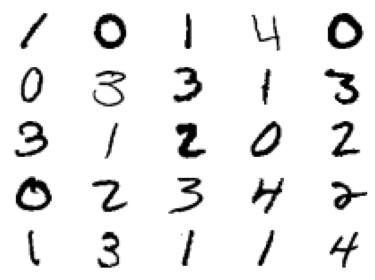

In [13]:
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(x[i].reshape(28,28), cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

**Build sklearn model**

In [14]:
x = np.reshape(x, (len(x), -1))/255
print(x.shape)
print(y.shape)

(21416, 784)
(21416,)


**PCA**

Scale the feature and check for the components

In [15]:
steps = [('scaling', StandardScaler()), ('pca', PCA(n_components=0.99))]
pipeline = Pipeline(steps)
pipeline.fit(x)

Pipeline(memory=None,
         steps=[('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.99,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [16]:
pipeline['pca'].n_components_

474

Reduce the data 

In [17]:
inv_trans_data = pipeline.inverse_transform(pipeline.transform(x))

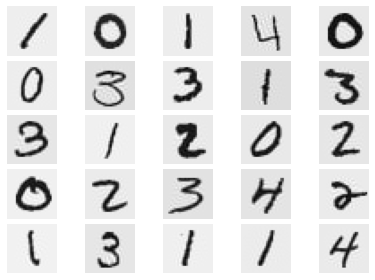

In [18]:
fig, ax_array = plt.subplots(5,5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(inv_trans_data[i].reshape(28,28), cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

Standardize the data

In [19]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [20]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [21]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=10,
            color=y, 
            colorscale='viridis',
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=800,height=400)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [22]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

**SVD**

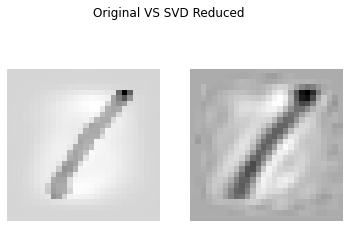

In [25]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(x)

image = svd.inverse_transform(X_svd[0].reshape(1, -1))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x[0].reshape(28,28), cmap='gray_r')
ax2.matshow(image.reshape(28,28), cmap='gray_r')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original VS SVD Reduced".format(y[0]))
plt.show()

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD

svd_pipeline = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=3,
                                 algorithm='randomized',
                                 random_state=42,
                                 n_iter=5))
svd_pipeline.fit(x,y)
x_transform = svd_pipeline.transform(x)

print(f'original image (pixels) : {x[0].shape[0]}')
print(f'reduced image (pixels) : {x_transform[0].shape[0]}')

original image (pixels) : 784
reduced image (pixels) : 3


In [27]:
plot_2d(x_transform[:, 0],x_transform[:, 1])

**LLE**

In [29]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=3,eigen_solver='dense') 
lle_transform = lle.fit_transform(x[:1000])


In [30]:
lle_transform.shape

(1000, 3)

In [31]:
plot_2d(lle.embedding_[:, 0],lle.embedding_[:, 1])

**T-SNE**

In [33]:
pca1 = PCA(n_components=50)
pca1 = pca1.fit_transform(x[:1000])
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca1)

In [34]:
plot_2d(tsne[:, 0],tsne[:, 1])

**ISOMAP**

In [35]:
from sklearn.manifold import Isomap

isomap1 = Isomap(n_components=3) 
isomap_transform = isomap1.fit_transform(x[:1000]) 


In [36]:
plot_2d(isomap1.embedding_[:, 0],isomap1.embedding_[:, 1])

**UMAP**

In [37]:
umap1 = umap.UMAP(random_state=42,n_components=3)
umap_transform = umap1.fit_transform(x[:1000])

In [38]:
plot_2d(umap1.embedding_[:, 0],umap1.embedding_[:, 1])

**Conclusion**


Out of all the techniques, UMAP depicts the clusters properly and is very clearly binding its data points, and can compute faster than other techniques.

